# Evaluación de Compras en Videojuegos en Steam: Metacritic vs Steam
### Integrantes:
- Vicente Alarcón
- Matías Fontecilla

### Resumen ejecutivo del proyecto:

En el entorno actual, los videojuegos se han convertido en productos altamente comercializados, generando un interés significativo en la crítica especializada. Este proyecto se centra en la evaluación de la confiabilidad de las reseñas de videojuegos en Metacritic, una plataforma líder en este campo. Nos proponemos abordar preguntas esenciales: ¿Son las puntuaciones de Metacritic un indicador fiable de la calidad de un videojuego? ¿Existe una relación entre las puntuaciones de Metacritic y las ganancias del juego? ¿Las opiniones de los usuarios en Steam coinciden con las calificaciones de Metacritic?

Para abordar estas interrogantes, analizaremos datos de Steam que incluyen información sobre las puntuaciones de Metacritic, las valoraciones de los usuarios en Steam, los precios de los juegos y las estimaciones de ventas. A través de este análisis, buscamos obtener una comprensión profunda de la percepción de la calidad de los videojuegos por parte de la comunidad de usuarios de Steam y determinar si esta concuerda con las evaluaciones de una plataforma especializada como Metacritic.

### Gestión del cambio:

Uno de los aspectos que se modifcó fueron los objetivos, ya que a pesar de mantenerse el objetivo general, se modifcaron los objetivos especificos, para que considerarán la correlación entre los puntajes de Steam y Metacritic, con la cantidad de ventas de los videojuegos.

En ese sentido los nuevos objetivos específicos son:

- Analizar los datos para crear un gráfico que muestra la correlación entre los puntajes de Metacritic y la venta de los videojuegos.

- Analizar los datos para crear un gráfico que muestra la correlación entre los puntajes de Steam y la venta de los videojuegos.

### Descripción del progreso en cada objetivo específico:

Desde el último avance hemos podido gráficar exitosamente la correlación entre los puntajes de Metacritic y la venta de los videojuegos, y la correlación entre los puntajes de Steam y la venta de los videojuegos.

Para esto, hemos hecho uso de matrices de correlación, y gráficos de dispersión, para poder visualizar la relación entre las variables.

En este sentido, la realización de dichos gráficos, no sólo ayudan a la visualización de los datos, sino que también nos permiten tener una idea de la relación entre las variables, y así poder realizar una predicción de la venta de los videojuegos, en base a los puntajes de Metacritic y Steam.

Para este tipo de predicción, se utilizará un modelo de clasificación, cómo el random forest, que nos permitirá predecir la venta de los videojuegos, en base a los puntajes de Metacritic y Steam, y a otras variables que se consideren relevantes.

## Procedimiento:

Importa las librerias necesarias para el proyecto

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score


Se tiene un dataset con respecto a todos los juegos en la plataforma Steam, el cual contiene las siguientes columnas:

| Variable                   | Significado                                                                                                                                                                                                                  |
|----------------------------|------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| App ID | Identificador del videojuego en Steam. |
| Name | Nombre del videojuego. |
| Release date | Fecha de lanzamiento del videojuego. |
| Estimated owners | Número estimado de propietarios del videojuego. |
| Peak CCU | Pico de usuarios concurrentes. |
| Required age | Edad requerida para jugar el videojuego. |
| Price | Precio del videojuego. |
| DLC count | Cantidad de contenido descargable disponible. |
| About the game | Descripción del videojuego. |
| Supported languages | Idiomas soportados por el videojuego. |
| Full audio languages | Idiomas con soporte de audio completo. |
| Reviews | Reseñas y calificaciones del videojuego. |
| Header image | Imagen de encabezado del videojuego. |
| Website | Sitio web del videojuego. |
| Support url | URL de soporte técnico. |
| Support email | Correo electrónico de soporte técnico. |
| Windows | Compatibilidad con el sistema operativo Windows. |
| Mac | Compatibilidad con el sistema operativo Mac. |
| Linux | Compatibilidad con el sistema operativo Linux. |
| Metacritic score | Puntuación del videojuego en Metacritic. |
| Metacritic url | URL de la página del videojuego en Metacritic. |
| User score | Puntuación de los usuarios para el videojuego. |
| Positive | Número de comentarios positivos del videojuego. |
| Negative | Número de comentarios negativos del videojuego. |
| Score rank | Rango de puntuación del videojuego. |
| Achievements | Logros disponibles en el videojuego. |
| Recommendations | Recomendaciones del videojuego. |
| Notes | Notas adicionales sobre el videojuego. |
| Average playtime forever | Tiempo promedio de juego en total. |
| Average playtime two weeks | Tiempo promedio de juego en las últimas dos semanas. |
| Median playtime forever | Tiempo mediano de juego en total. |
| Median playtime two weeks | Tiempo mediano de juego en las últimas dos semanas. |
| Developers | Desarrolladores del videojuego. |
| Publishers | Editores del videojuego. |
| Categories | Categorías a las que pertenece el videojuego. |
| Genres | Géneros a los que pertenece el videojuego. |
| Tags | Etiquetas asociadas al videojuego. |
| Screenshots | Capturas de pantalla del videojuego. |
| Movies | Videos promocionales o de juego del videojuego. |
| Year | Año de lanzamiento del videojuego. |
| Reviewer rating | Valoración de usuarios en metacritic | 
| Positive ratio | Proporción de comentarios positivos en metacritic|


# Limpieza de datos

Este código realiza los pasos iniciales de carga y preprocesamiento de datos:

1. Lee el archivo 'games.csv' en un DataFrame de pandas. Cada fila en el DataFrame representa un juego, y cada columna representa una característica del juego.

2. Lee el archivo 'dataset.csv' en un DataFrame de pandas. Y lo combina con el DataFrame anterior, para tener un DataFrame con todos los datos.

3. Define una lista de nombres de columnas que queremos excluir de nuestro DataFrame. Estas columnas no son necesarias para nuestro análisis.

4. Elimina las columnas listadas en la lista `exclude` del DataFrame. El DataFrame resultante, `games_crop`, contiene solo las columnas en las que estamos interesados para nuestro análisis.




In [17]:
games_df = pd.read_csv('games.csv')
# Lee el nuevo archivo CSV
additional_data_df = pd.read_csv('dataset.csv')

# id' en 'dataset.csv' corresponde con 'AppID' en 'games.csv'
# # Combina ambos conjuntos de datos utilizando la columna 'AppID' como clave
merged_df = pd.merge(games_df, additional_data_df[['id', 'year', 'reviewer_rating','positivity_ratio']], left_on='AppID', right_on='id', how='left')

# Llena los valores nulos en las columnas relevantes con cero
merged_df['year'] = merged_df['year'].fillna(0)
merged_df['reviewer_rating'] = merged_df['reviewer_rating'].fillna(0)

merged_df['positivity_ratio'] = merged_df['positivity_ratio'].fillna(0)


# Eliminar las columnas 'id' y 'AppID', no se necesitan
merged_df = merged_df.drop(['id', 'AppID'], axis=1)

exclude = ['Name', 'Release date', 'About the game', 'Publishers','DLC count','Achievements', 'Supported languages','Header image', 'Website','Categories', 'Tags','Support url', 'Developers', 'Support email', 'Metacritic url', 'Notes',  'Genres', 'Screenshots', 'Movies',  'Reviews', 'Full audio languages', 'User score',  'Movies',  'Score rank', 'Windows']
games_crop = merged_df.drop(exclude, axis=1)

Se realiza la codificación de etiquetas en la columna 'Estimated owners' del DataFrame `games_crop` y luego elimina esa columna del DataFrame. Aquí está el desglose paso a paso:

1. Crea una instancia de la clase `LabelEncoder` del módulo sklearn.preprocessing. LabelEncoder se utiliza para transformar etiquetas no numéricas a etiquetas numéricas.

2. Aplica el codificador de etiquetas a la columna 'Estimated owners' del DataFrame `games_crop`. El método `fit_transform` ajusta el codificador de etiquetas y devuelve las etiquetas codificadas.

3. Convierte la columna 'Estimated owners' (que ahora está codificada con etiquetas) a una lista y la almacena en la variable `estimated_owners_list`.

4. Elimina la columna 'Estimated owners' del DataFrame `games_crop`. El parámetro `inplace=True` significa que la operación se realiza en el lugar en el DataFrame y devolverá None.

In [18]:
le = LabelEncoder()

games_crop['Estimated owners'] = le.fit_transform(games_crop['Estimated owners'])

estimated_owners_list = games_crop['Estimated owners'].tolist()

games_crop.drop(['Estimated owners'], axis=1, inplace=True)

Esta línea de código utiliza la función `train_test_split` del módulo model_selection de sklearn para dividir el conjunto de datos en conjuntos de entrenamiento y prueba.

In [5]:

X_train, X_test, y_train, y_test = train_test_split(games_crop, estimated_owners_list, test_size=0.2, random_state=42)

Crea un modelo con la parametrización óptima y lo ajusta a los datos de entrenamiento. Luego, predice valores a partir de las datos de prueba.

In [6]:
rf = RandomForestClassifier(n_estimators=100, max_depth=10, criterion='entropy',max_features='sqrt',bootstrap=False)
rf.fit(X_train,y_train)

y_pred = rf.predict(X_test)

Despliega las metricas de rendimiento del modelo.

In [7]:
f1 = f1_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print(f"F1 Score: {f1:.2f}\nAccuracy: {accuracy:.2f}\nPrecision: {precision:.2f}\nRecall: {recall:.2f}")

F1 Score: 0.79
Accuracy: 0.81
Precision: 0.78
Recall: 0.81


Despliega una comparación de las predicciones con los valores reales.

In [8]:
# Obtén las columnas 'Price', 'Metacritic score' y 'Positive' del conjunto de prueba
additional_columns = X_test[['Price', 'Metacritic score', 'Positive']].copy()

# Agrega las columnas al DataFrame predDf
predDf = pd.DataFrame({'Actual': le.inverse_transform(y_test), 'Predicted': le.inverse_transform(y_pred)})

# Combina predDf con las columnas adicionales
predDf = pd.concat([additional_columns.reset_index(drop=True),predDf], axis=1)

# Muestra el DataFrame resultante
display(predDf)

,Price,Metacritic score,Positive,Actual,Predicted
0,5.99,0,0,0 - 20000,0 - 20000
1,0.99,0,0,0 - 0,0 - 20000
2,3.99,0,0,0 - 20000,0 - 20000
3,6.99,0,96,0 - 20000,0 - 20000
4,0.90,0,4,0 - 20000,0 - 20000
...,...,...,...,...,...
15712,9.99,0,0,0 - 20000,0 - 20000
15713,0.99,0,2,0 - 20000,0 - 20000
15714,1.99,0,2,0 - 20000,0 - 20000
15715,3.99,0,41,0 - 20000,0 - 20000


In [9]:
compareDf = pd.DataFrame(
    {
        'Variables': games_crop.columns,
        'Importancia': rf.feature_importances_
    }
)
display(compareDf)

,Variables,Importancia
0,Peak CCU,0.031095
1,Required age,0.001215
2,Price,0.130205
3,Mac,0.001362
4,Linux,0.001076
5,Metacritic score,0.006671
6,Positive,0.227464
7,Negative,0.211998
8,Recommendations,0.062773
9,Average playtime forever,0.066806


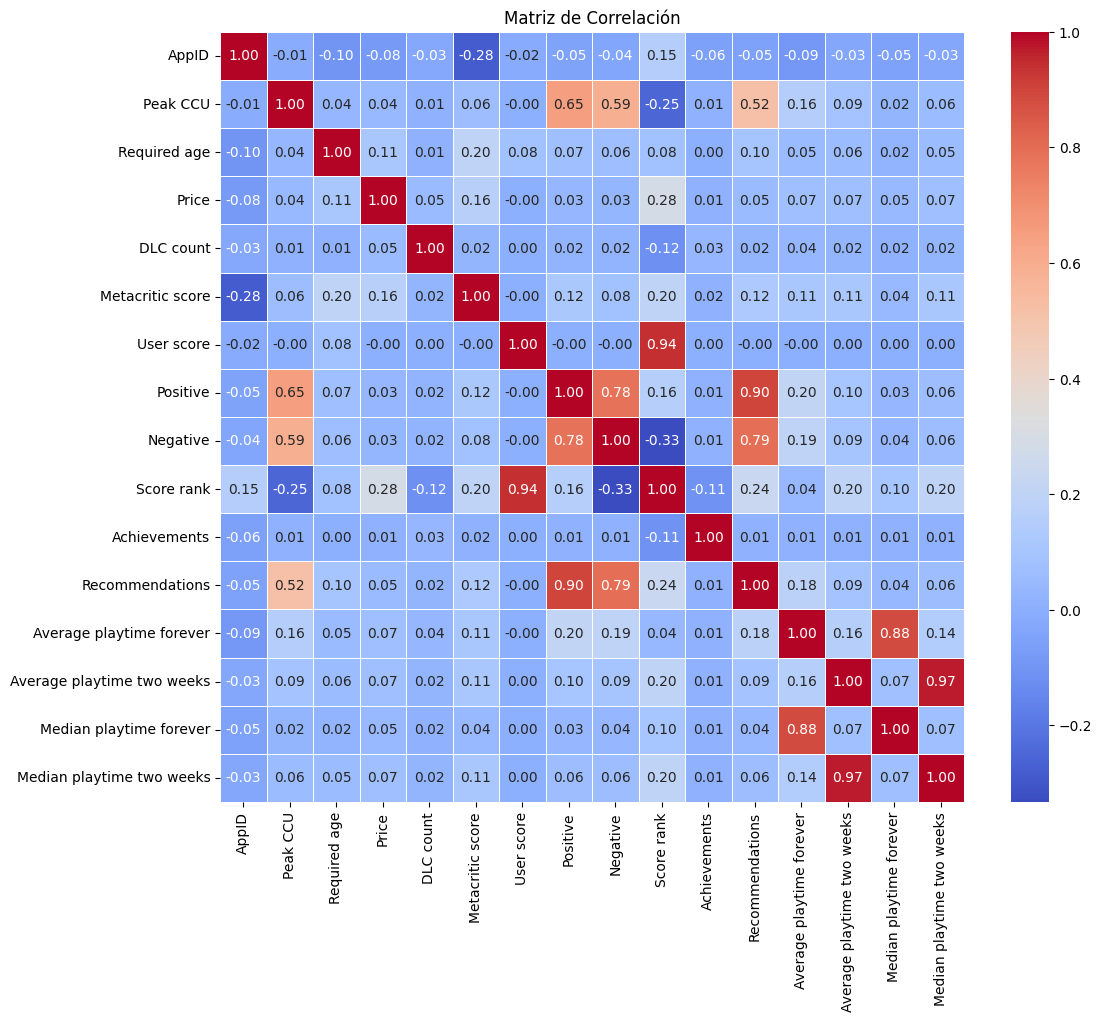

In [10]:
# Crear una copia del DataFrame original
games_df_numeric = games_df.copy()

# Eliminar las columnas no numéricas
games_df_numeric = games_df_numeric.select_dtypes(include=[np.number])

# Calcular la matriz de correlación
correlation_matrix = games_df_numeric.corr()

# Crear un mapa de calor
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación')
plt.show()

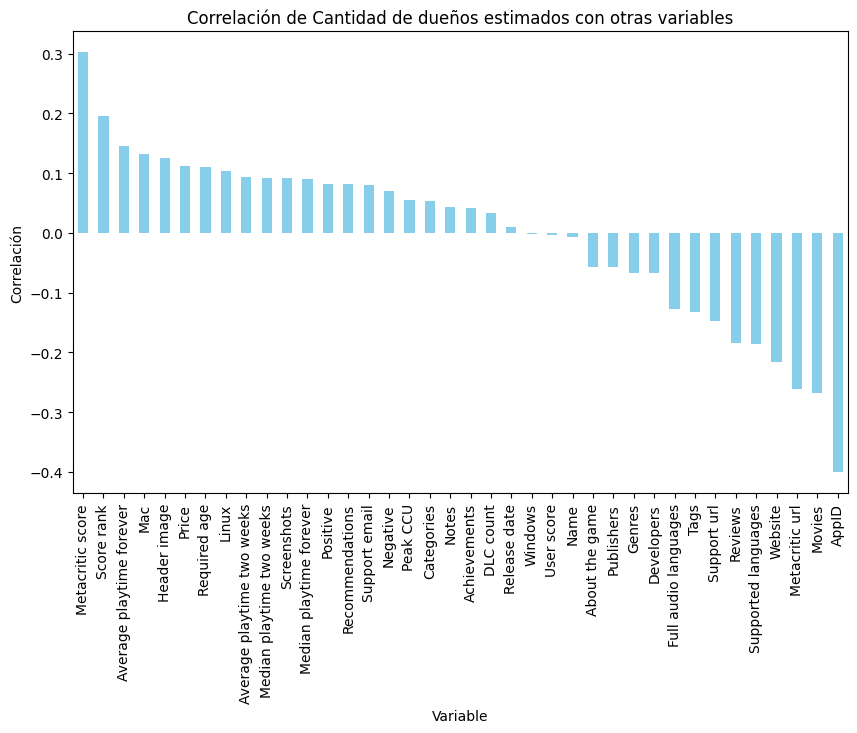

In [24]:
# Crear una copia del DataFrame original
games_df_numeric = games_df.copy()


# Inicializar el LabelEncoder
le = LabelEncoder()

# Iterar sobre todas las columnas del DataFrame
for col in games_df_numeric.columns:
    # Si el tipo de datos de la columna es object (categórico), usar LabelEncoder
    if games_df_numeric[col].dtype == 'object':
        # Ajustar y transformar la columna con LabelEncoder
        games_df_numeric[col] = le.fit_transform(games_df_numeric[col])
# Ajustar y transformar la columna 'estimated_owners' con LabelEncoder
games_df_numeric['Estimated owners'] = le.fit_transform(games_df_numeric['Estimated owners'])

# Calcular la correlación de 'Estimated owners' con otras variables
correlation_with_owners = games_df_numeric.corr()['Estimated owners'].sort_values(ascending=False)

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
correlation_with_owners.drop('Estimated owners').plot(kind='bar', color='skyblue')
plt.title('Correlación de Cantidad de dueños estimados con otras variables')
plt.xlabel('Variable')
plt.ylabel('Correlación')
plt.show()

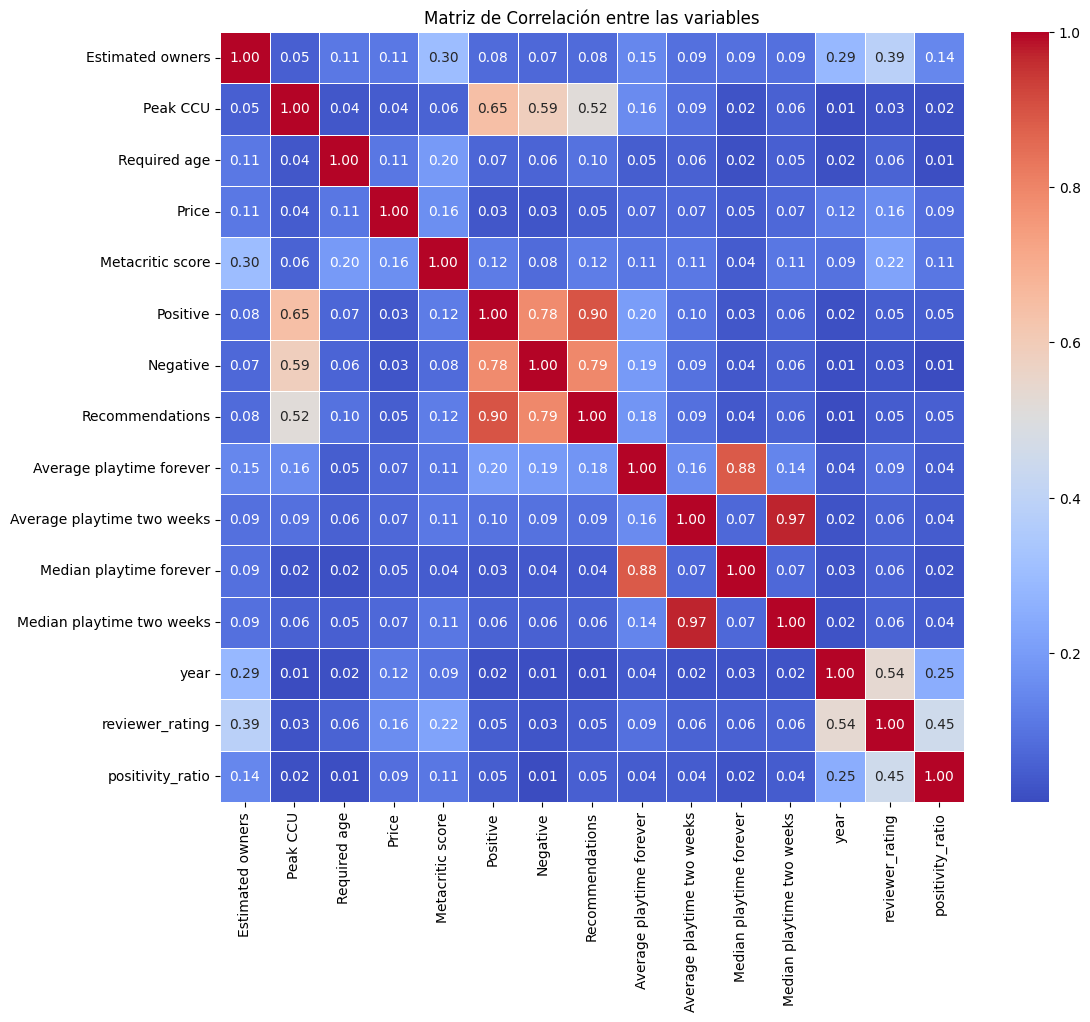

In [21]:
# Crear una copia del DataFrame original
games_crop_numeric = games_crop.copy()
games_crop_numeric['Estimated owners'] = estimated_owners_list

# Eliminar las columnas no numéricas
games_crop_numeric = games_crop_numeric.select_dtypes(include=[np.number])

# Calcular la matriz de correlación
correlation_matrix = games_crop_numeric.corr()

# Crear un mapa de calor
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación entre las variables')
plt.show()

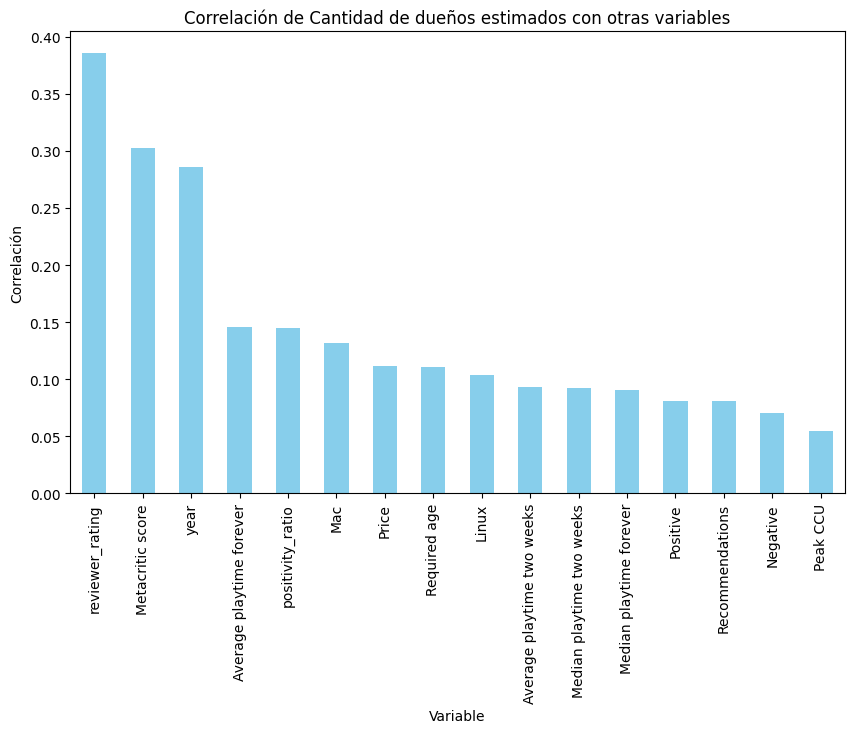

In [23]:
# Crear una copia del DataFrame original
games_crop_numeric = games_crop.copy()
games_crop_numeric['Estimated owners'] = estimated_owners_list
# Inicializar el LabelEncoder
le = LabelEncoder()

# Ajustar y transformar la columna 'estimated_owners' con LabelEncoder
games_crop_numeric['Estimated owners'] = le.fit_transform(games_crop_numeric['Estimated owners'])

# Calcular la correlación de 'Estimated owners' con otras variables
correlation_with_owners = games_crop_numeric.corr()['Estimated owners'].sort_values(ascending=False)
# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
correlation_with_owners.drop('Estimated owners').plot(kind='bar', color='skyblue')
plt.title('Correlación de Cantidad de dueños estimados con otras variables')
plt.xlabel('Variable')
plt.ylabel('Correlación')
plt.show()